In [113]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction import stop_words
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt  
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import f1_score
from tqdm import tqdm
from matplotlib.gridspec import GridSpec
import math
import string
import numpy as np
import seaborn as sns

from sklearn.metrics import confusion_matrix

stopwords = stop_words.ENGLISH_STOP_WORDS

ToName = {'nb': 'navie bayes', 'mnb': 'multimodal navie bayes', 'lsvc':'Linear SVC'}


newsgroups_train=fetch_20newsgroups(subset='train')
newsgroups_test=fetch_20newsgroups(subset='test')

train_texts=newsgroups_train['data']
train_labels=newsgroups_train['target']
test_texts=newsgroups_test['data']
test_labels=newsgroups_test['target']
print(len(train_texts),len(test_texts))

def clean(doc): # doc is a string of text
    doc = doc.replace("</br>", " ") # This text contains a lot of <br/> tags.
    doc = "".join([char for char in doc if char not in string.punctuation and not char.isdigit()])
    doc = " ".join([token for token in doc.split() if token not in stopwords])
    # remove punctuation and numbers
    return doc

def ppl(clf, fs):
  if clf == 'nb':
    model = GaussianNB()
  elif clf == 'mnb':
    model = MultinomialNB()
  else:
    model = LinearSVC()
  text_clf=Pipeline([('tfidf',TfidfVectorizer(max_features=fs, preprocessor=clean)),
                    ('clf',model)])
  text_clf=text_clf.fit(train_texts,train_labels)
  predicted=text_clf.predict(test_texts)
  return predicted



11314 7532


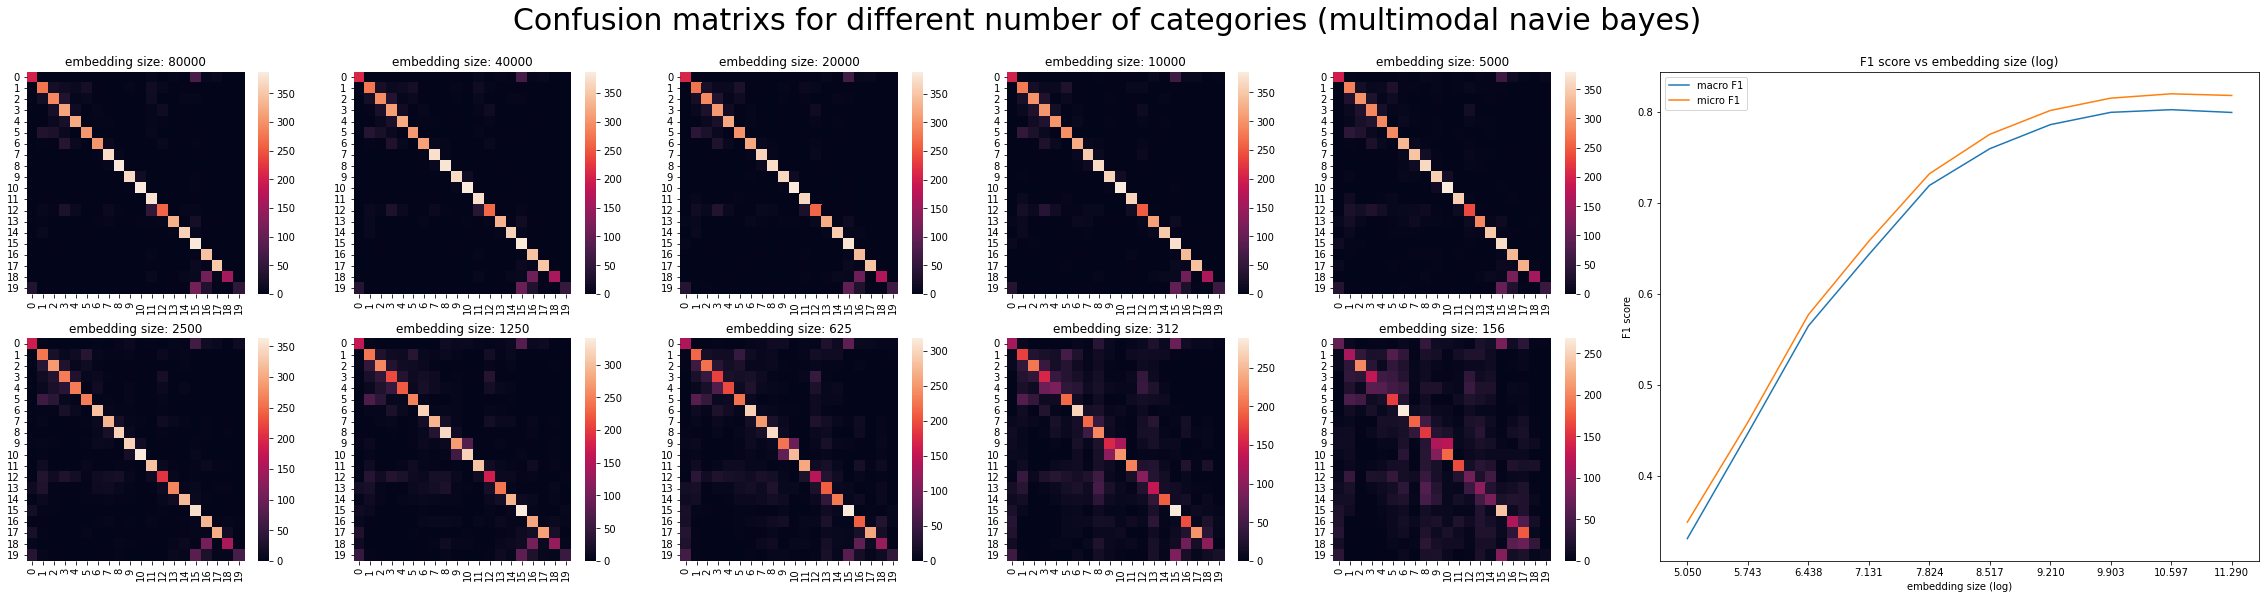

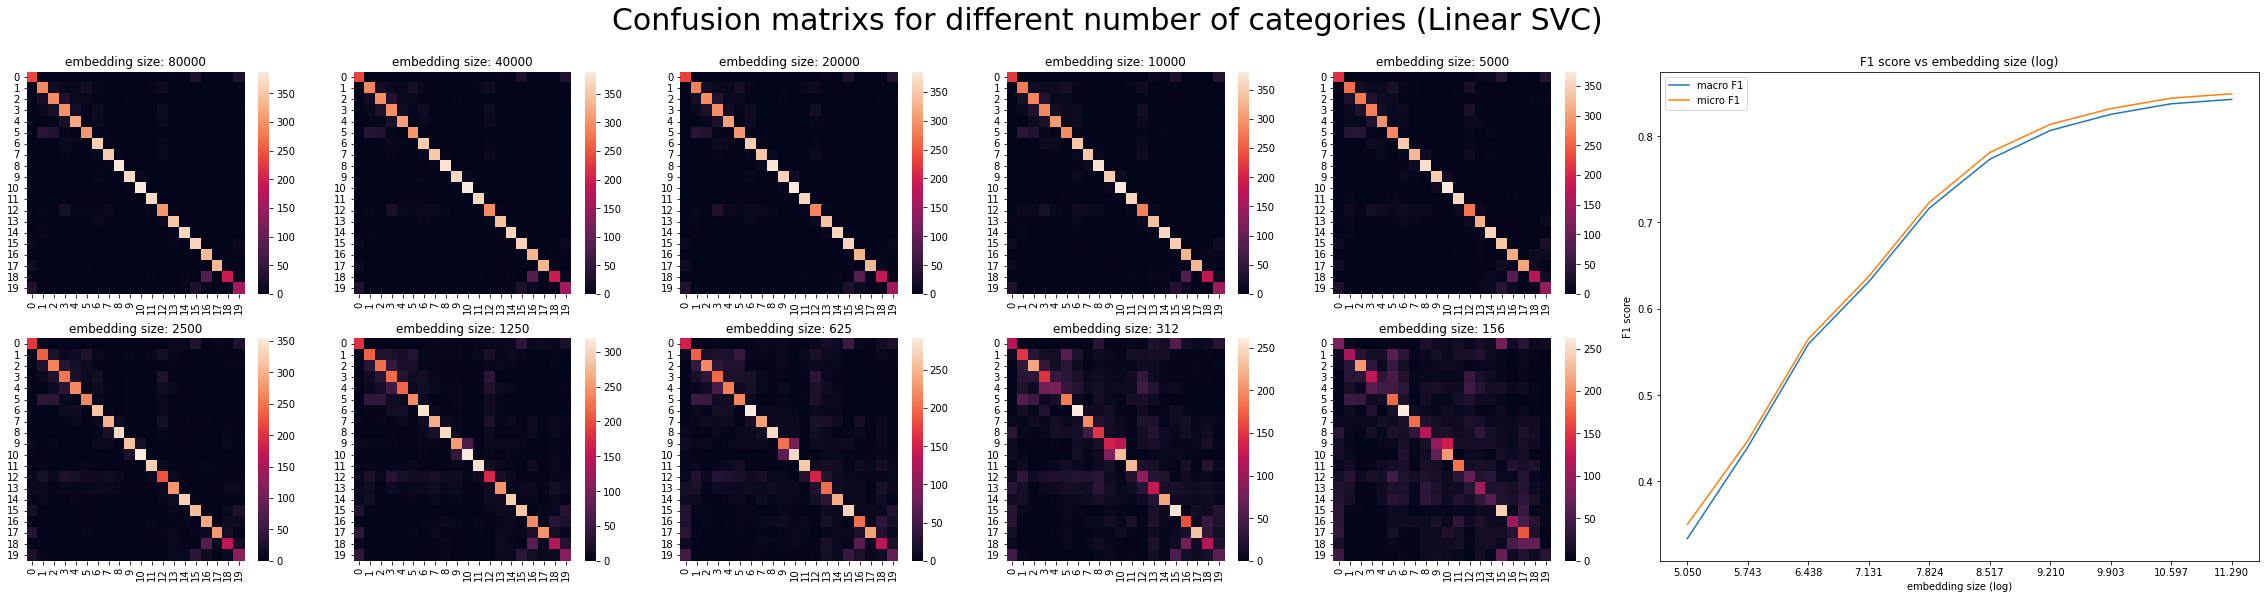

In [114]:
for row, clf in enumerate(['mnb', 'lsvc']):
  fig, axes = plt.subplots(2, 7, figsize=(40,9))
  fig.suptitle('Confusion matrixs for different number of categories (%s)'% ToName[clf], fontsize=30)
  macro, micro = [], []
  n_feature = []
  initial_fs = 80000
  for col, idx in enumerate(range(10)):
    predicted_test_t = ppl(clf=clf, fs=initial_fs)
    ax_ = axes[(col)//5][(col)%5]
    ax_.set_title('embedding size: %i' %initial_fs)
    cm = confusion_matrix(test_labels, predicted_test_t)
    sns.heatmap(cm, ax=ax_)


    macro.append(f1_score(test_labels, predicted_test_t, average='macro'))
    micro.append(f1_score(test_labels, predicted_test_t, average='micro'))
    n_feature.append(math.log(initial_fs))
    initial_fs = int(initial_fs/2)

  axes[0][5].axis('off')
  axes[0][6].axis('off')
  axes[1][5].axis('off')
  axes[1][6].axis('off')
  gs = GridSpec(2, 7, figure=fig)
  ax = fig.add_subplot(gs[:,5:])
  ax.set_title('F1 score vs embedding size (log)')
  ax.set_xlabel('embedding size (log)')
  ax.set_ylabel('F1 score')
  ax.plot(n_feature, macro, label='macro F1')
  ax.plot(n_feature, micro, label='micro F1')
  ax.set_xticks(n_feature)
  plt.legend()
  plt.show()

In [116]:
predicted_test_t = ppl(clf='mnb', fs=30000)
print(f1_score(test_labels, predicted_test_t, average='macro'))
print(f1_score(test_labels, predicted_test_t, average='micro'))


0.8026679792296898
0.8193043016463091


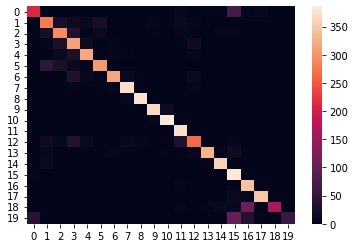

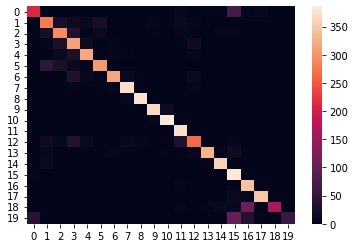

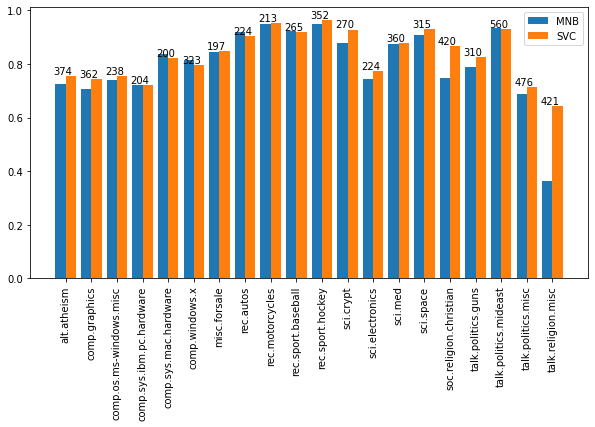

In [131]:
predicted_test_t = ppl(clf='mnb', fs=30000)
cm = confusion_matrix(test_labels, predicted_test_t)
plt.figure()
sns.heatmap(cm)
lens = {}

for _i in range(20):
  lens[_i] = [] 
for _idx, _i in enumerate(newsgroups_test.target):
  lens[_i].append(len(newsgroups_test.data[_idx].split(' ')))
for _i in range(20):
  lens[_i] = sum(lens[_i])/len(lens[_i])
cm = confusion_matrix(test_labels, predicted_test_t)
plt.figure()
sns.heatmap(cm)

cats = newsgroups_train['target_names']
plt.figure(figsize=(10,5))
plt.bar(np.array(range(len(cats)))-0.2, f1_score(test_labels, predicted_test_t, average=None), width=0.4, label='MNB')

predicted_test_t = ppl(clf='lsvc', fs=30000)

plt.bar(np.array(range(len(cats)))+0.2, f1_score(test_labels, predicted_test_t, average=None), width=0.4, label='SVC')
plt.xticks(list(range(len(cats))), labels=cats, rotation=90)
plt.legend()
for _idx,(x,y) in enumerate(zip(np.array(range(len(cats)))-0.2,f1_score(test_labels, predicted_test_t, average=None))):
    plt.text(x+0.1,y,'%i' %int(lens[_idx]), ha='center',va='bottom')
plt.show()